In [5]:
from appyter import magic 
magic.init(lambda _= globals: _())

In [6]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import pandas as pd
import umap
from pycombat import Combat
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
%%appyter hide_code

{% do SectionField(name='section0', 
                   title='Table of Contents',
                   subtitle='This is an appyter that can visualize the relationship between age and gene expression. Begin by first typing in the gene in the input field below. Then you can customize what colors you would like for the plots. You can also choose which plots you would like to download',
                   img='toc.svg'
)%}

{% do SectionField(name='section1',
                   title='Input Gene',
                   subtitle='Input the name of the gene that you would like to view',
                   img = 'gene.svg'
)%}

{% do SectionField(name='section2',
                  title='Model Selection',
                   subtitle='Customize which parts of the model you would like to view',
                   img = 'graph.svg'
)%}

{% do SectionField(name='section4',
                   title ='Select Plots to Include',
                   subtitle='Select which of the plots tha you would like to include',
                   img = 'onoff.svg'
                   
)%}

{% do SectionField(name='section3',
                   title ='Download Figures',
                   subtitle = 'Select which figures you would like to download',
                   img = 'download.svg'
)%}


In [8]:
%%appyter code_exec

GENE_INPUT = {{ StringField(
                name = 'GENE_STRING',
                label = 'Gene String',
                default = 'MARVELD2',
                section = 'section1'
)}}

```python

GENE_INPUT = 'MARVELD2'
```

In [14]:
%%appyter code_exec
GRAPH_COLOR =  {{
    ChoiceField(name='Graph Colors',
             label='Choose the color schema of the Graphs',
             default = 'viridis',
             choices={'viridis':'1', 'plasma':'2'},
             section='section2'
            ) }}

```python

GRAPH_COLOR =  1
```

In [65]:
%%appyter code_exec
INCLUDE_PCA = {{
    BoolField(name='INCLUDE_PCA',
             label='Include PCA plot?',
             default = False,
             section ='section4'
    
             )}}


INCLUDE_UMAP = {{
    BoolField(name='INCLUDE_UMAP',
             label='Include UMAP plot?',
             default = False,
             section = 'section4'
    
             )}}

INCLUDE_TSNE = {{
    BoolField(name='INCLUDE_TSNE',
             label='Include TSNE plot?',
             default = False,
             section = 'section4'
    
             )}}


INCLUDE_COMBAT = {{
    BoolField(name='INCLUDE_COMBAT',
             label='Include Combat plot?',
             default = False,
             section = 'section4'
    
             )}}

```python
INCLUDE_PCA = False
INCLUDE_UMAP = False
INCLUDE_TSNE = False
INCLUDE_COMBAT = False
```

In [9]:
%%appyter code_exec
DOWNLOAD_PLOT = {{
    BoolField(name='DOWNLOAD_PLOT',
              label='Download the gene plot?',
              default = False,
              section = 'section3'
             )
}}

DOWNLOAD_PCA = {{
    BoolField(name='DOWNLOAD_PCA',
              label='Download PCA?',
              default = False,
              section = 'section3'
             )
}}

DOWNLOAD_TSNE = {{
    BoolField(name='DOWNLOAD_TSNE',
              label='Download t-SNE?',
              default = False,
              section = 'section3'
             )
}}

DOWNLOAD_UMAP = {{
    BoolField(name='DOWNLOAD_UMAP',
              label='Download UMAP?',
              default = False,
              section = 'section3'
             )
}}

DOWNLOAD_COMBAT_DATA = {{
    BoolField(name='DOWNLOAD_COMBAT_DATA',
              label='Download Combat Plot?',
              default = False,
              section = 'section3'
             )
}}

```python
DOWNLOAD_PLOT = False
DOWNLOAD_PCA = False
DOWNLOAD_TSNE = False
DOWNLOAD_UMAP = False
DOWNLOAD_COMBAT_DATA = False
```

In [ ]:
SIGNIFICANT_M_GENES = ['tff2','ugt1a6b','2210407c18rik','saa3',
 'g530012d18rik','retnlb','clec4b1','gm14935','gm38019',
 'agpat2','orm1','cyp2c68','hsd17b6','gm27157',
 'klra13-ps', 'itih1','adtrp','proc','klrc2',
 'olfr1029','gpr39',
 'ces1c',
 'mup10',
 'mgst1',
 'rp24-211l21.1',
 'urad',
 '9030619p08rik',
 'wfdc21',
 'oog1',
 'mettl7b',
 'mup13',
 'olfr1034',
 'myl7',
 'rab17',
 'gm11567',
 'cyp3a44',
 'apoc2',
 'ugt2b1',
 'krt8-ps',
 'ifitm2',
 'plac8',
 'aadac',
 'phgr1',
 'agxt',
 'esrp2',
 'cyp2d9',
 'kcne3',
 'cyp4a32',
 'gm12608',
 'krt79',
 'gm15368',
 'tinag',
 'akr1c19',
 '2010003k11rik',
 'vnn1',
 'otc',
 'sult1b1',
 'pnpla5',
 'fam162b',
 'gm9515',
 'foxa2',
 'ppp1r14d',
 'krtap3-1',
 'ces1d',
 'ugt1a8',
 'cyp2d10',
 'gm4788',
 'gm15077',
 'gm933',
 'mogat2',
 'gnat3',
 'alppl2',
 'cyp2c53-ps',
 'gm13655',
 'slc17a1',
 'slc22a27',
 'gimd1',
 'defb40',
 'cyp2b9',
 'cyp2d11',
 'sult1d1',
 'gm3470',
 'gsta2',
 'rhbg',
 'gm13550',
 'gsta1',
 'entpd8',
 'prss8',
 'krt84',
 'gm9458',
 'tmem171',
 'spink5',
 'defb37',
 'ces1e',
 '2610528j11rik',
 'cyp2d34',
 'r3hdml',
 'marcksl1-ps4',
 'krt36',
 'gm379',
 'prm1',
 'lrrc61',
 'gpr25',
 'dennd4b',
 'pip5k1c',
 'crkl',
 'rhobtb2',
 'sbf1',
 'kcnab2',
 'btbd11',
 'dnajc27',
 'nxpe3',
 'ac109138.1',
 'carns1',
 'prkacb',
 'rap1gds1',
 'pitpnm1',
 'pacs1',
 'ap1m1',
 'arc',
 'rltpr',
 'clcn6',
 'madd',
 'sugp1',
 'cic',
 'pom121',
 'siah3',
 'zmiz2',
 'crtc1',
 'cep120',
 'nol6',
 'chst10',
 'prdm2',
 'tmem229b',
 'gltscr1l',
 'ldoc1l',
 'herc3',
 'gba2',
 'aak1',
 'orai2',
 'ercc4',
 'ncdn',
 'foxred2',
 'ppp3r1',
 'fam53c',
 'rnf157',
 'hcfc1',
 'srebf2',
 'sept6',
 'dcaf7',
 'foxk1',
 'smap2',
 'prrc2b',
 'ccdc97',
 'dcaf5',
 'mast3',
 'cnp',
 'uba1',
 'adar',
 'mkl1',
 'med24',
 'pi4ka',
 'zer1',
 'slc25a12',
 'abca2',
 'map2k7',
 'trappc12',
 'fnbp1',
 'them6',
 'cacnb1',
 'slc9a7',
 'ap2a1',
 'st8sia1',
 'sfxn3',
 'rbl2',
 'prrc2a',
 'zfp142',
 'gm42742',
 'cdyl2',
 'abhd8',
 'ankrd52',
 'zfhx2',
 'atp8b2',
 'pip4k2b',
 'moap1',
 'gtpbp1',
 'bap1',
 'gpatch2l',
 'vps52',
 'slc14a1',
 'gm28036',
 'cherp',
 'egr4',
 'cdkn2d',
 'tbc1d22b',
 'ube2j1',
 'sp2',
 'smarcd1',
 'efr3a',
 'zc3h6']

In [26]:
SIGNIFICANT_H_GENES = ['ac011841.1',
'gs1-184p14.2',
'itgb1p1',
'rp1-145m24.1',
 'ripk3',
'serpini1',
 'map3k1',
'pyroxd2',
 'izumo2',
'krt8p48',
 'fam21ep', 'rp5-1174j21.2',
'rp13-104f24.1',
 'tnfrsf11b',
'eef1a1p6',
 'cdx1',
'rp11-461g12.2',
 'or51e1',
'sirt4',
 'ac091654.7',
'mkrn9p',
 'fam131b',
'znf155',
 'myh1',
'cd84',
 'tas2r4',
'ac090498.1',
 'rnft1p3',
'kb-1396h2.2',
 'ac013404.1',
'tstd3',
 'rp11-407p15.1',
'jam2',
'rpl12p14',
 'rp11-79d8.2',
'ac017035.2',
 'rp11-1180f24.1',
'arsdp1',
 'mansc1',
'palm2',
 'gsdmb',
'bnip3p1',
 'tmem56-rwdd3',
'eif4a2p4',
 'arhgef37',
'l3mbtl3',
 'hnrnpa3p12',
'vwa5b1',
 'ac017081.1',
'ac017081.3',
 'xg',
'dusp4',
 'c2orf72',
'rp11-481h12.1',
 'palm2-akap2',
'tpmtp1',
 'rp11-231c18.3',
'cep170p1',
 'myl12ap1',
'gsx2',
 'al513412.1',
'rp11-408p14.1',
 'loxl4',
'arhgap26',
 'rps3ap12',
'cbx3p4',
 'whammp3',
'rp11-16f15.2',
 'c4orf47',
'celp',
 'rasgrp4',
'dapl1',
 'whammp2',
'fgf1',
 'ldhap5',
'myl6p1',
 'txnip',
'marveld2',
 'hspa8p5',
'nodal',
 'hsp90aa6p',
'smg1p4',
 'rpl7p11',
'prb3',
 'rpl23ap69',
'rp11-621h8.2',
 'manba',
'eif3cl',
 'nxpe2',
'btg2',
 'rpl3p4',
'znf285b',
 'nbea',
'mab21l1',
 'ptenp1',
'ywhazp6',
 'rp11-309l24.6', 'psphp1',
'rp11-516a11.1',
'rp11-544o24.2',
 'gpat3',
'chrna9',
 'dusp5p1',
'grin2a',
 'gbp5',
'aplnr',
 'sycp2',
'thsd1',
 'ac079776.2',
'tspan18',
 'cpne5', 'clec1a',
'mmp3',
 'apoc1',
'il27ra',
 'slco2a1',
'ctd-2370n5.3',
 'arsi',
'mgat5b',
 'c3orf36',
'llnlf-176f2.1',
 'elfn1',
'cox6a1p2',
 'ifnw1',
'matn2',
 'aspg',
'znf833p',
 'c8b',
'ptgds',
 'rp11-253m7.3',
'aldh1a3',
 'radil',
'slc38a3',
 'hpse',
'ltbp4',
 'gpr19',
'hhipl2',
 'fgf23',
'il4i1',
 'ccdc74b',
'gabrq',
 'rp11-464d20.2',
'abhd17ap5',
 'card9',
'fbln2',
 'mms22l',
'cfap46',
 'lrrc3',
'artn',
 'lhb',
'stmn3',
 'alg1l6p',
'myo1f',
 'vgf',
'camk2n2',
 'fbxo16',
'hormad1',
 'rp11-1113l8.6',
'ch507-42p11.2',
 'bcl6b',
'pde6g',
 'hip1',
'kiaa1456',
 'rp11-214k3.5',
'trpv4',
 'frmpd3',
'spon2',
 'potef',
'ctb-159g17.4', 'rab27b',
 'rp11-357g3.1',
'brca2',
 'ccdc173',
'rps2p35',
 'cdh15',
'nudt8',
 'ctb-60b18.6',
'camk2a',
'foxf1',
 'slc35f2',
'plppr3',
 'cx3cl1',
'rad21l1',
 'cntfr',
'diras3',
 'slc26a1',
'hist1h2ai',
 'ctd-2060c23.1',
'scara3',
 'pcdh19',
'lgals9',
 'rph3al',
'gbp4',
 'prex1',
'hey1',
'ptp4a3',
'kif21b',
'otogl',
'sncaip',
 'gabre']

In [51]:
M_AWS_URL = 'http://appyters.maayanlab.cloud/storage/Age_Expression_Appyter/mouseagedatav2.csv'
H_AWS_URL = 'http://appyters.maayanlab.cloud/storage/Age_Expression_Appyter/humanagedatav2.csv'
    
    
M_AGE_DF = pd.read_csv(M_AWS_URL)
H_AGE_DF = pd.read_csv(H_AWS_URL)

In [52]:
DFs = []
SP = []
AGE_DFs = []
if GENE_INPUT.lower() in M_AGE_DF.columns:
    M_AGE_DF = M_AGE_DF.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1)
    M_MEAN_DF = M_AGE_DF.groupby('age').mean().reset_index()
    DFs.append(M_MEAN_DF)
    SP.append('Mouse')
    AGE_DFs.append(M_AGE_DF)
if GENE_INPUT.lower() in H_AGE_DF.columns:
    H_AGE_DF = H_AGE_DF.drop(['Unnamed: 0', 'Unnamed: 0.1', 'GSMS'], axis = 1)
    H_MEAN_DF = H_AGE_DF.groupby('AGE (YEARS)').mean().reset_index()
    DFs.append(H_MEAN_DF)
    SP.append('Human')
    AGE_DFs.append(H_AGE_DF)
if GENE_INPUT.lower() not in H_AGE_DF.columns and GENE_INPUT.lower() not in M_AGE_DF.columns:
    print('Error, you have entered an invalid gene name. Please restart the appyter and enter a valid gene name.')


In [ ]:
color_dict = {'1':'viridis', '2':'plasma'}

## Regression

In [11]:
def lin_func(m,x,b):
    return m*x + b

def exp_func(a,b,c,x):
    return a* np.exp(-b * x) + c

def quad_func(a,b,c,x):
    return a*x**2 + b*x + c


In [12]:
from scipy.optimize import curve_fit

In [18]:
age_array = MEAN_DF[age].to_numpy()
exampl= MEAN_DF[str(GENE_CHOICE)].to_numpy()

lin_pars, lin_cov = curve_fit(f=lin_func, xdata = age_array, ydata = exampl)

In [19]:
new_y =[]
for x in age_array:
    new_y.append(lin_func(x,*lin_pars))


Text(0.5, 1.0, 'Gene Expression vs Age of Gene 15257')

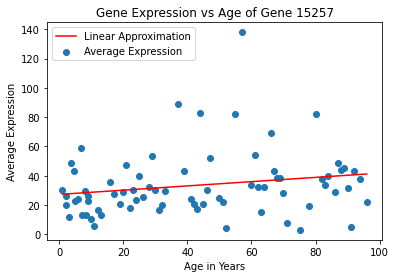

In [23]:
plt.scatter(age_array, exampl)
plt.plot(age_array,new_y, color = 'red')
plt.legend(['Linear Approximation', 'Average Expression'])
plt.xlabel('Age in Years')
plt.ylabel('Average Expression')
plt.title(f'Gene Expression vs Age of Gene {GENE_CHOICE}')

## Age-Expression Curve

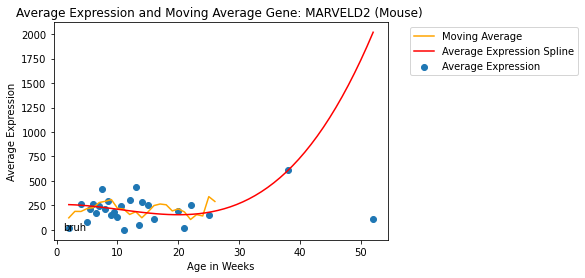

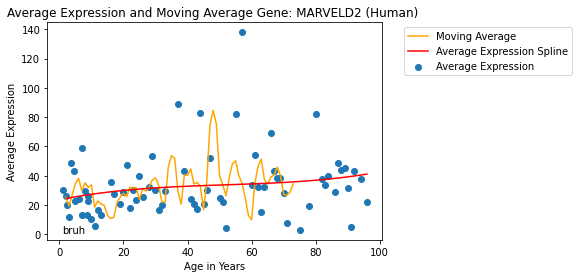

In [55]:
for x in range(len(DFs)):
    MEAN_DF = DFs[x]
    if SP[x] == 'Mouse':
        SPECIES = 'Mouse'
        age = 'age'
    else:
        SPECIES = 'Human'
        age = 'AGE (YEARS)'
    data_x = MEAN_DF[age]
    data_y = MEAN_DF[GENE_INPUT.lower()]


    train_x, valid_x, train_y, valid_y = train_test_split(data_x,data_y,test_size=0.33)
    weights = np.polyfit(train_x,train_y,3)
    model = np.poly1d(weights)
    xp = np.linspace(valid_x.min(),valid_x.max())
    pred = model(valid_x)
    pred_plot = model(xp)

    rolling_mean = MEAN_DF.rolling(window=3).mean()

    fig, ax = plt.subplots()
    plt.scatter(MEAN_DF[age], MEAN_DF[GENE_INPUT.lower()])
    rolling_mean[GENE_INPUT.lower()].plot(legend=True,color='orange' )
    plt.plot(xp,pred_plot, color = 'red')
    if SP[x] == 'Mouse':
        plt.xlabel('Age in Weeks')
    else:
        plt.xlabel('Age in Years')
    plt.ylabel('Average Expression')
    plt.title(f'Average Expression and Moving Average Gene: {GENE_INPUT} ({SPECIES}) ')
    label = ['Moving Average', 'Average Expression Spline', 'Average Expression']
    plt.legend(label, bbox_to_anchor=(1.05,1.0))
    ax.text(1.0,1.0,'bruh')
    plt.show()
    
    if GENE_INPUT.lower() not in SIGNIFICANT_H_GENES or GENE_INPUT.lower() not in SIGNIFICANT_M_GENES:
        print('Note: The gene you are currently viewing was deemed to not have a high enough spearman correlation to exhibit monotonic behavior.')
        print('As such, you may see some expression values that do not seem to make much sense in the context of the model. The gene you are looking at did not have a low enough p value to render it useful for analysis')
        

    if DOWNLOAD_PLOT:
        plt.savefig(f'GenePlot{GENE_INPUT}.png')

## PCA for the Dataset

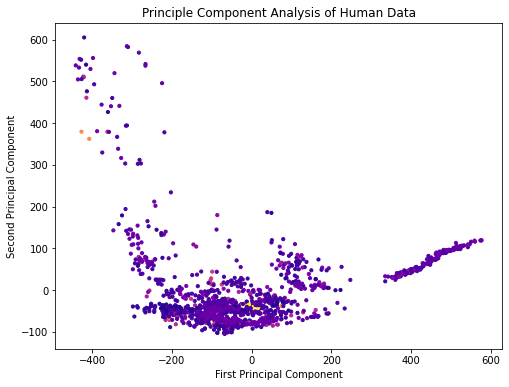

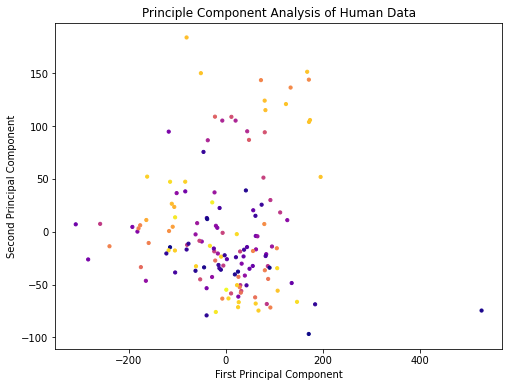

In [60]:
PCA_COMPS = []
PCAs = []
PCA_DFs = []
xpcas = []
for x in range(len(DFs)):
    if SP[x] =='Human':
        age = 'AGE (YEARS)'
        PCA_DF = AGE_DF = H_AGE_DF
    else:
        age = 'age'
        PCA_DF = AGE_DF = M_AGE_DF
    PCA_DFs.append(PCA_DF)
    data = PCA_DF.to_numpy()
    for x in range(len(data)):
        for y in range(len(data[x])):
            data[x][y] = np.log2(data[x][y] + 1)


    trans1 = pd.DataFrame(data)

    pca = PCA(n_components = 2)
    qt = QuantileTransformer(n_quantiles=AGE_DF.shape[0],output_distribution='normal')

    data_trans = qt.fit_transform(trans1)
    pca.fit(data_trans)
    x_pca = pca.transform(data_trans)
    
    xpcas.append(x_pca)
    
    PCA_COMPS.append(pca.components_)
    PCAs.append(pca)
    plt.figure(figsize=(8,6))
    plt.scatter(x_pca[:,0], x_pca[:,1],c=AGE_DF[age], cmap = 'plasma', s = 10)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(f'Principle Component Analysis of {SP[x]} Data')

    if DOWNLOAD_PCA:
        plt.savefig(f'PCA{GENE_INPUT}.png')

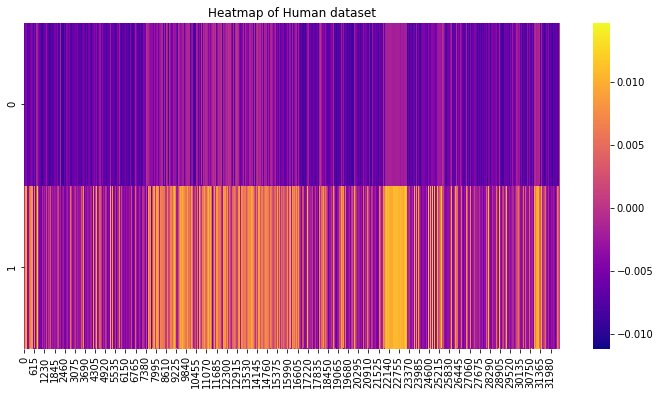

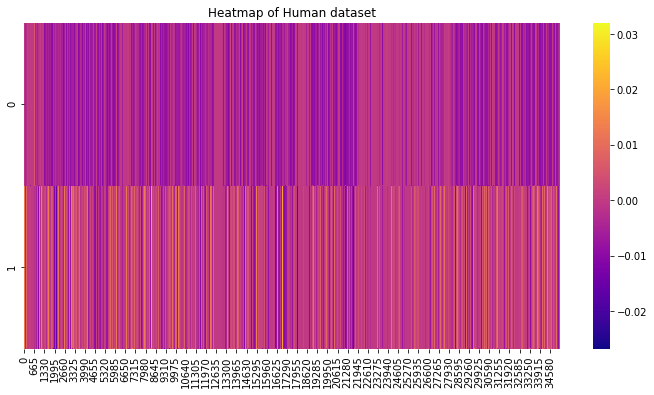

In [61]:
for x in range(len(PCA_COMPS)):
    df_comp_s = pd.DataFrame(PCA_COMPS[x])
    plt.figure(figsize=(12,6))
    plt.xlabel('Genes')
    plt.ylabel('Principal Components')
    plt.title(f'Heatmap of {} dataset')
    sns.heatmap(df_comp_s, cmap='plasma')

## T-SNE for the Dataset

In [35]:
if INCLUDE_TSNE:
    for x in range(len(DFs))
        if SP[x] == 'Human':
            age = 'AGE (YEARS)'
        else:
            age = 'age'
        AGE_DF = AGE_DFs[x]
        tsne = TSNE(n_components=2, perplexity=35, learning_rate=250)
    
        pca_df = pd.DataFrame(xpcas[x])
        tsne_results = tsne.fit_transform(pca_df)

        plt.figure(figsize=(8,6))
        plt.scatter(tsne_results[:,0], tsne_results[:,1],c=AGE_DF[age], cmap = color_dict[GRAPH_COLOR], s = 10)
        plt.xlabel('T-SNE 2D-One')
        plt.ylabel('T-SNE 2D-Two')
        plt.title(f'T-SNE Plot of {SP[x]} Expression Data')

        if DOWNLOAD_TSNE:
            plt.savefig(f't-SNE{GENE_INPUT}.png')

## Batch Effect Removal with PyCombat

/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/pycombat/pycombat.py:156: RuntimeWarning: invalid value encountered in true_divide
  change = max((abs(gam_post - gam_prior) / gam_prior).max(),
/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/pycombat/pycombat.py:157: RuntimeWarning: divide by zero encountered in true_divide
  (abs(del_sq_post - del_sq_prior) / del_sq_prior).max())


Text(0, 0.5, 'Batch Effect Removal')

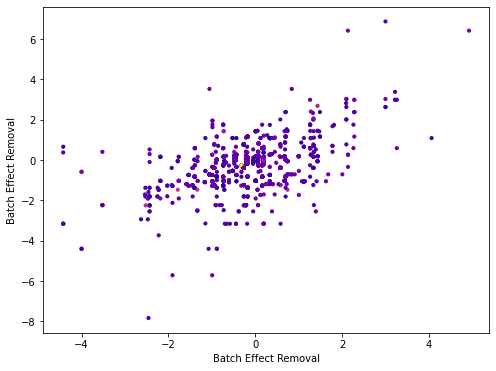

In [32]:
if INCLUDE_COMBAT:
    
    combat = Combat()
    c_dat = combat.fit_transform(data_trans[:,:32543],data_trans[:,32543])

    plt.figure(figsize=(8,6))
    plt.scatter(c_dat[:,0], c_dat[:,1],c=AGE_DF[age], cmap = 'plasma', s = 10)
    plt.xlabel('Batch Effect Removal')
    plt.ylabel('Batch Effect Removal')
    plt.title('Batch Effect Removed Data for Mouse Age Data')

## UMAP Plot

Text(0, 0.5, 'UMAP Second Component')

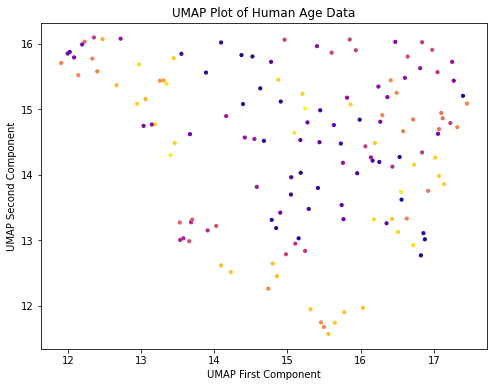

In [39]:
if INCLUDE_UMAP:
    reducer = umap.UMAP()

    embedding = reducer.fit_transform(data_trans)

    plt.figure(figsize=(8,6))
    plt.scatter(embedding[:,0], embedding[:,1],c=AGE_DF[age], cmap = 'plasma', s = 10)
    plt.title('UMAP Plot of Human Age Data')
    plt.xlabel('UMAP First Component')
    plt.ylabel('UMAP Second Component')

    if DOWNLOAD_UMAP:
        plt.savefig(f'UMAP{GENE_INPUT}.png')